# Using the MNE report


`
Authors: Mainak Jas <mainak.jas@telecom-paristech.fr>
         Alex Gramfort <alexandre.gramfort@telecom-paristech.fr>
`

License: BSD (3-clause)

This quick start will show you how to run the `mne report` command on the
sample data set provided with MNE.

First ensure that the files you want to render follow the filename conventions
defined by MNE:

Data object        | Filename convention (ends with)
-------------------|-----------------------------------------------------
raw                | -raw.fif(.gz), -raw_sss.fif(.gz), -raw_tsss.fif(.gz)
events             | -eve.fif(.gz)
epochs             | -epo.fif(.gz)
evoked             | -ave.fif(.gz)
covariance         | -cov.fif(.gz)
trans              | -trans.fif(.gz)
forward            | -fwd.fif(.gz)
inverse            | -inv.fif(.gz)

The command line interface
--------------------------

To generate a barebones report from all the \*.fif files in the sample dataset,
invoke the following command in a system (e.g., Bash) shell:

In [1]:
!mne report --path /Users/alex/work/src/mne-python/examples/MNE-sample-data/ --overwrite

/Users/alex/work/src/mne-python/mne/utils.py:289: RuntimeWarning: `info_fname` not provided. Cannot render -cov.fif(.gz) and -trans.fif(.gz) files.
  warnings.warn(message, category, stacklevel=stacklevel)
`info_fname` not provided. Cannot render -cov.fif(.gz) and -trans.fif(.gz) files.
/Users/alex/anaconda/lib/python2.7/site-packages/matplotlib/tight_layout.py:225: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")
/Users/alex/work/src/mne-python/mne/utils.py:289: RuntimeWarning: `subjects_dir` and `subject` not provided. Cannot render MRI and -trans.fif(.gz) files.
  warnings.warn(message, category, stacklevel=stacklevel)
`subjects_dir` and `subject` not provided. Cannot render MRI and -trans.fif(.gz) files.


On successful creation of the report, it will open the html in a new tab in the browser.
To disable this, use the `--no-browser` option.

If the report is generated for a single subject, give the ``SUBJECT`` name and the
``SUBJECTS_DIR`` and this will generate the MRI slices (with BEM contours overlaid on top
if available):

    $ mne report --path MNE-sample-data/ --subject sample --subjects-dir MNE-sample-data/subjects --verbose

To properly render `trans` and `covariance` files, add the measurement information:

    $ mne report --path MNE-sample-data/ --info MNE-sample-data/MEG/sample/sample_audvis-ave.fif \ 
          --subject sample --subjects-dir MNE-sample-data/subjects --verbose

To render whitened `evoked` files with baseline correction, add the noise covariance file:
    
    $ mne report --path MNE-sample-data/ --info MNE-sample-data/MEG/sample/sample_audvis-ave.fif \ 
          --cov MNE-sample-data/MEG/sample/sample_audvis-cov.fif --bmax 0 --subject sample \
          --subjects-dir MNE-sample-data/subjects --verbose

To generate the report in parallel:

    $ mne report --path MNE-sample-data/ --info MNE-sample-data/MEG/sample/sample_audvis-ave.fif \ 
          --subject sample --subjects-dir MNE-sample-data/subjects --verbose --jobs 6

The report rendered on sample-data is available at:

https://dl.dropboxusercontent.com/u/3915954/report.html

For help on all the available options, do:

In [2]:
!mne report --help

Usage: mne report [options]

Create mne report for a folder

Options:
  --version             show program's version number and exit
  -h, --help            show this help message and exit
  -p PATH, --path=PATH  Path to folder who MNE-Report must be created
  -i FILE, --info=FILE  File from which info dictionary is to be read
  -c FILE, --cov=FILE   File from which noise covariance is to be read
  --bmin=BMIN           Time at which baseline correction starts for evokeds
  --bmax=BMAX           Time at which baseline correction stops for evokeds
  -d SUBJECTS_DIR, --subjects-dir=SUBJECTS_DIR
                        The subjects directory
  -s SUBJECT, --subject=SUBJECT
                        The subject name
  -v, --verbose         run in verbose mode
  --no-browser          Do not open MNE-Report in browser
  --overwrite           Overwrite html report if it already exists
  -j N_JOBS, --jobs=N_JOBS
                        Number of jobs to run in parallel
  -m MRI_DECIM, --mri-deci

The Python interface
--------------------

The same functionality can also be achieved using the Python interface. Import
the required functions::

In [3]:
from mne.report import Report
from mne.datasets import sample

Generate the report:

In [4]:
path = sample.data_path()
report = Report(verbose=True)

Embedding : jquery-1.10.2.min.js
Embedding : jquery-ui.min.js
Embedding : bootstrap.min.js
Embedding : jquery-ui.min.css
Embedding : bootstrap.min.css


Only include \*audvis_raw.fif and \*-eve.fif files in the report:

In [5]:
report.parse_folder(data_path=path, pattern=['*audvis_raw.fif', '*-eve.fif'])

`info_fname` not provided. Cannot render -cov.fif(.gz) and -trans.fif(.gz) files.
Iterating over 5 potential files (this may take some time)
Rendering : /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_raw.fif
Opening raw data file /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Current compensation grade : 0
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Adding average EEG reference projection.


-c:1: RuntimeWarning: `info_fname` not provided. Cannot render -cov.fif(.gz) and -trans.fif(.gz) files.


1 projection items deactivated
Rendering : /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_ecg-eve.fif
Rendering : /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_eog-eve.fif
Rendering : /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif
Rendering : /Users/alex/work/data/mne-scripts/sample-data/MEG/sample/sample_audvis_raw-eve.fif
`subjects_dir` and `subject` not provided. Cannot render MRI and -trans.fif(.gz) files.


-c:1: RuntimeWarning: `subjects_dir` and `subject` not provided. Cannot render MRI and -trans.fif(.gz) files.


Save the report as an html, but do not open the html in a browser:

In [6]:
report.save('report.html', overwrite=True, open_browser=False)

Rendering : Table of Contents
events
	... e_audvis_ecg-eve.fif
	... e_audvis_eog-eve.fif
	... ilt-0-40_raw-eve.fif
	... e_audvis_raw-eve.fif
raw
	... ample_audvis_raw.fif


'/Users/alex/work/src/mne-python-notebooks/report.html'

There is greater flexibility compared to the command line interface. 
Custom plots can be added to the report. Let us first generate a custom plot:

Reading /Users/alex/work/src/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


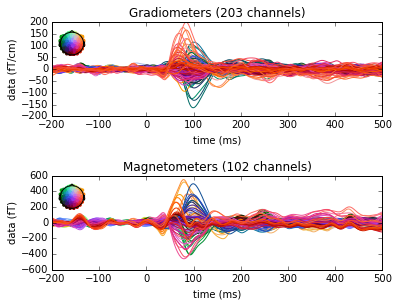

/Users/alex/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [7]:
%matplotlib inline

from mne import read_evokeds
fname = path + '/MEG/sample/sample_audvis-ave.fif'
evoked = read_evokeds(fname, condition='Left Auditory', baseline=(None, 0), verbose=True)
fig = evoked.pick_types(meg=True).plot(spatial_colors=True)

To add the custom plot to the report, do:

In [8]:
report.add_figs_to_section(fig, captions='Left Auditory', section='evoked')
report.save('report.html', overwrite=True)

Rendering : Table of Contents
events
	... e_audvis_ecg-eve.fif
	... e_audvis_eog-eve.fif
	... ilt-0-40_raw-eve.fif
	... e_audvis_raw-eve.fif
raw
	... ample_audvis_raw.fif
evoked
	... port_evoked-#-custom


'/Users/alex/work/src/mne-python-notebooks/report.html'

The MNE report command internally manages the sections so that plots belonging to the same section
are rendered consecutively. Within a section, the plots are ordered in the same order that they were 
added using the `add_figs_to_section` command. Each section is identified by a toggle button in the navigation 
bar of the report which can be used to show or hide the contents of the section.

That's it!